In [1]:
import pandas as pd
import glob
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [2]:
os.chdir('/home1/gkrtod35/ISF/TimeGAN/Origin_data')

In [3]:
df = pd.read_csv('merged_data_processed_seoul.csv', low_memory=False)
df.head()

,Idx,date,time,solar generation,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),...,일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,0,2014-01-01,0,0.0,2014-01-01 00:00,3.3,3.8,250.0,65.0,5.0,...,0.0,0.0,0.0,6.0,6.0,0.0,0.1,-0.2,0.0,1.5
1,0,2014-01-01,1,0.0,2014-01-01 01:00,2.6,2.3,250.0,66.0,4.9,...,0.0,0.0,0.0,0.0,0.0,-0.1,0.1,-0.2,0.1,1.5
2,0,2014-01-01,2,0.0,2014-01-01 02:00,1.7,1.7,250.0,67.0,4.6,...,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,-0.2,0.0,1.5
3,0,2014-01-01,3,0.0,2014-01-01 03:00,1.4,1.4,250.0,60.0,4.1,...,0.0,0.0,0.0,0.0,0.0,-0.4,0.0,-0.2,0.1,1.5
4,0,2014-01-01,4,0.0,2014-01-01 04:00,0.9,2.8,270.0,59.0,3.8,...,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,-0.2,0.0,1.5


In [16]:
subset = df.iloc[-24:, 1:4]

In [11]:
subset1 = df.iloc[-24:, 4:]

In [12]:
subset1

,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
86880,2023-11-30 00:00,-4.0,4.0,320.0,56.0,2.5,-11.5,1017.8,1028.9,0.0,0.00,0.0,0.0,0.0,-3.2,2.8,3.1,4.1,5.5
86881,2023-11-30 01:00,-4.8,3.0,340.0,51.0,2.2,-13.4,1018.4,1029.5,0.0,0.00,0.0,0.0,0.0,-3.7,2.6,3.0,4.1,5.4
86882,2023-11-30 02:00,-5.2,2.4,290.0,48.0,2.0,-14.5,1018.6,1029.8,0.0,0.00,0.0,0.0,0.0,-4.2,2.5,2.9,4.0,5.4
86883,2023-11-30 03:00,-5.6,3.9,320.0,49.0,2.0,-14.6,1018.8,1030.0,0.0,0.00,0.0,0.0,0.0,-4.6,2.4,2.8,3.9,5.3
86884,2023-11-30 04:00,-6.1,3.3,290.0,47.0,1.8,-15.6,1018.6,1029.8,0.0,0.00,0.0,0.0,0.0,-5.1,2.3,2.7,3.8,5.3
86885,2023-11-30 05:00,-6.4,2.1,290.0,49.0,1.9,-15.3,1018.6,1029.8,0.0,0.00,0.0,0.0,0.0,-5.4,2.2,2.6,3.8,5.2
86886,2023-11-30 06:00,-6.8,1.9,290.0,50.0,1.8,-15.5,1018.8,1030.0,0.0,0.00,0.0,0.0,0.0,-5.7,2.1,2.5,3.7,5.2
86887,2023-11-30 07:00,-7.0,3.3,320.0,48.0,1.7,-16.1,1019.1,1030.3,0.0,0.00,0.0,0.0,0.0,-5.9,1.9,2.4,3.6,5.1
86888,2023-11-30 08:00,-7.1,2.8,320.0,48.0,1.7,-16.2,1019.5,1030.7,0.3,0.04,0.0,0.0,0.0,-5.8,1.8,2.3,3.5,5.1
86889,2023-11-30 09:00,-6.5,2.7,290.0,47.0,1.8,-15.9,1019.5,1030.7,1.0,0.53,0.0,0.0,0.0,-3.4,1.6,2.2,3.4,5.0


In [11]:
# 셀 A: (터미널이 아닌 노트북 환경일 때) 라이브러리 재설치 및 재로딩
%pip install --upgrade numpy matplotlib --quiet

import importlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# numpy 모듈 다시 로드
importlib.reload(np)

Note: you may need to restart the kernel to use updated packages.



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home1/gkrtod35/miniconda3/envs/df/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home1/gkrtod35/miniconda3/envs/df/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home1/gkrtod35/miniconda3/envs/df/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home1/gkrtod35/miniconda3/envs/df/lib/python3.10/site-packages/traitlets/config/application.py", line 10

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [13]:
import pickle

# 'array.pkl'에 저장된 NumPy 배열을 불러오기
with open('/home1/gkrtod35/Diffusion-TS/merged_results/merged_seq8640.pkl', 'rb') as f:
    merged = pickle.load(f)

In [14]:
merged[10000,:,0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13304804e-01,
       1.97944890e+00, 5.39680798e+00, 8.22719600e+00, 8.86804999e+00,
       8.08676004e+00, 7.47905601e+00, 5.28533205e+00, 2.41976789e+00,
       5.88211054e-01, 6.82885917e-04, 4.89600802e-02, 1.04760041e-01,
       1.07879867e-01, 7.13999403e-02, 0.00000000e+00, 0.00000000e+00,
       2.69101984e-02, 1.31736366e-02, 4.35987263e-02, 9.22769200e-02,
       9.49173275e-02, 9.59999412e-02, 4.82462504e-02, 3.32982125e-02,
       1.31101379e-01, 4.49405484e-01, 1.41408633e+00, 2.26448446e+00,
       3.69052151e+00, 5.12492549e+00, 6.85903925e+00, 6.37114927e+00,
       3.74832498e+00, 1.38520335e+00, 8.05050859e-02, 0.00000000e+00,
       1.68479104e-02, 0.00000000e+00, 0.00000000e+00, 9.68273734e-02])

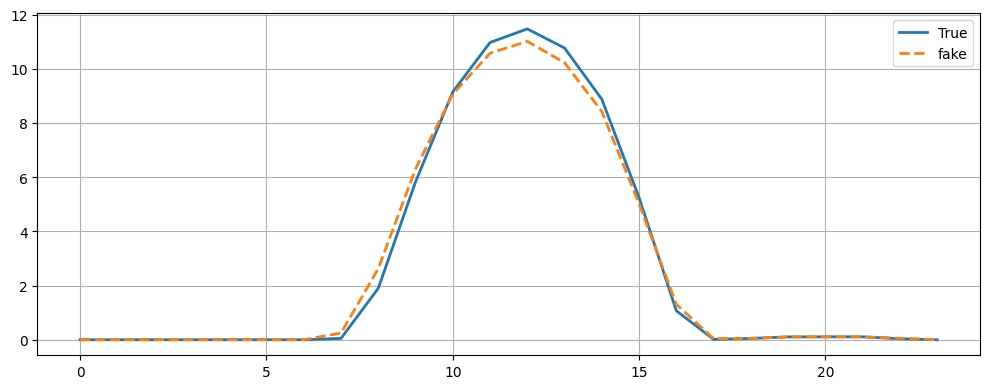

In [26]:
import numpy as np
import matplotlib.pyplot as plt

feat = 0   # 비교하고 싶은 피처 인덱스 (0~18)
plt.figure(figsize=(10,4))

# 
x = list(range(24))
y_orig = subset['solar generation']
#y_orig = seqs[5000, :, feat]
#y_fake = samples_all[5000, :, feat]
y_fake = merged[11000,0:24,0]

plt.plot(x, y_orig, label='True', lw=2)
plt.plot(x, y_fake, '--', label='fake', lw=2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("last_24h_forecast.png", dpi=300, bbox_inches="tight")
plt.show()